#Import Library

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels
import patsy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder

from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.diagnostic import acorr_ljungbox, het_white
from scipy.stats import kstest, shapiro

import warnings
warnings.filterwarnings("ignore")

#read dataset

In [ ]:
dfstd = pd.read_csv('student_performance_2022-2023.csv')

In [ ]:
df2018 = pd.read_csv('2018-University-Rankings.csv')

In [ ]:
df2019 = pd.read_csv('2019-University-Rankings.csv')

In [ ]:
df2022 = pd.read_csv('2021-2022-University-Rankings.csv')

In [ ]:
df2023 = pd.read_csv('2023-University-Rankings.csv')

In [ ]:
dfstd.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,university,student_id
0,female,group B,bachelor's degree,standard,none,72,72,74,University of Essex,27330634
1,female,group C,some college,standard,completed,69,90,88,National Central University,92958629
2,female,group B,master's degree,standard,none,90,95,93,Université de Montpellier,31367409
3,male,group A,associate's degree,free/reduced,none,47,57,44,Washington State University,97210441
4,male,group C,some college,standard,none,76,78,75,Keele University,99937559


In [ ]:
df2018.head()

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100,...,4,100,14,99.9,8,100,36,96.1,70,100
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100,...,5,100,12,99.4,12,99.6,54,72.7,177,98.7
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100,...,3,98.3,38,99.9,9,96.5,103,75.2,165,98.4
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,99.5,...,77,100,3,100,4,93.4,126,89.2,106,97.7
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,100,...,1,100,10,78.3,75,97.4,87,97.7,57,95.6


In [ ]:
df2019.head()

,rank_2019,rank_2018,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100,...,4,100,17,99.8,8,100,41,95.5,77,100
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100,...,5,100,16,99,13,99.8,56,70.5,190,98.6
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100,...,1,99.3,40,99.8,9,92.1,151,75.7,164,98.5
3,4,4,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,98.7,...,72,100,4,100,5,96.8,115,90.3,103,97.2
4,5,6,UNIVERSITY OF OXFORD,United Kingdom,L,FC,VH,5,A,100,...,3,100,7,83,56,99.6,63,98.8,43,96.8


In [ ]:
df2022.head()

,rank_2022,rank_2021,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5,B,100,...,4,100,15,99.8,7,100,43,94.1,87,100
1,2,2,Stanford University,United States,L,FC,VH,5,B,100,...,5,100,12,98.6,13,99.8,62,67.7,196,98.4
2,3,3,Harvard University,United States,L,FC,VH,5,B,100,...,1,98.7,40,99.6,8,86.3,186,62.2,221,97.4
3,4,5,University of Oxford,United Kingdom,L,FC,VH,5,A,100,...,3,100,8,84.7,45,99.7,64,98.5,50,97.2
4,5,4,California Institute of Technology (Caltech),United States,S,CO,VH,5,B,97.8,...,74,100,4,100,4,99.4,72,87.3,121,96.9


In [ ]:
df2023.head()

,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,academic_reputation_rank,employer_reputation_score,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5.0,B,100.0,5,100.0,4,100.0,14,100.0,5,100.0,54,90.0,109,100
1,University of Cambridge,United Kingdom,L,FC,VH,5.0,A,100.0,2,100.0,2,100.0,11,92.3,55,100.0,60,96.3,70,98.8
2,Stanford University,United States,L,FC,VH,5.0,B,100.0,4,100.0,5,100.0,6,99.9,9,99.8,74,60.3,235,98.5
3,University of Oxford,United Kingdom,L,FC,VH,5.0,A,100.0,3,100.0,3,100.0,8,90.0,64,98.8,101,98.4,54,98.4
4,Harvard University,United States,L,FC,VH,5.0,B,100.0,1,100.0,1,99.4,35,100.0,2,76.9,228,66.9,212,97.6


## Cek data kosong, tipe data, dan data duplikat

In [ ]:
print('Tabel Student')
print(dfstd.info())
print("")
print('Tabel Ranking Universitas 2018')
print(df2018.info())
print("")
print('Tabel Ranking Universitas 2019')
print(df2019.info())
print("")
print('Tabel Ranking Universitas 2022')
print(df2022.info())
print("")
print('Tabel Ranking Universitas 2023')
print(df2023.info())

Tabel Student
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   university                   1000 non-null   object
 9   student_id                   1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.2+ KB
None

Tabel Ranking Universitas 2018
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 22 columns):
 # 

In [ ]:
print('Tabel Student')
print('Jumlah baris duplikat : ',dfstd.duplicated().any())
print("")
print('Tabel Ranking Universitas 2018')
print('Jumlah baris duplikat : ',df2018.duplicated().any())
print("")
print('Tabel Ranking Universitas 2019')
print('Jumlah baris duplikat : ',df2019.duplicated().any())
print("")
print('Tabel Ranking Universitas 2022')
print('Jumlah baris duplikat : ',df2022.duplicated().any())
print("")
print('Tabel Ranking Universitas 2023')
print('Jumlah baris duplikat : ',df2023.duplicated().any())

Tabel Student
Jumlah baris duplikat :  False

Tabel Ranking Universitas 2018
Jumlah baris duplikat :  False

Tabel Ranking Universitas 2019
Jumlah baris duplikat :  False

Tabel Ranking Universitas 2022
Jumlah baris duplikat :  False

Tabel Ranking Universitas 2023
Jumlah baris duplikat :  False


#Data Analysis

##Question - 1
Pihak universitas kerap menyediakan beberapa fasilitas sebagai penunjang mahasiswa dalam proses belajar. Data terkait fasilitas kampus yang kita miliki sangat terbatas, diantaranya adalah fasilitas makan siang dan fasilitas course persiapan ujian.

***Apakah dengan adanya fasilitas-fasilitas tersebut dapat menunjang performa akademik mahasiswa?***


In [ ]:
dfstd.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,university,student_id
0,female,group B,bachelor's degree,standard,none,72,72,74,University of Essex,27330634
1,female,group C,some college,standard,completed,69,90,88,National Central University,92958629
2,female,group B,master's degree,standard,none,90,95,93,Université de Montpellier,31367409
3,male,group A,associate's degree,free/reduced,none,47,57,44,Washington State University,97210441
4,male,group C,some college,standard,none,76,78,75,Keele University,99937559


Berdasarkan data yang dimiliki, hanya kolom lunch, test preparation course, math score, reading score, dan writing score yang kita butuhkan. Oleh karena itu, kita akan drop kolom lainnya.


In [ ]:
dfstd = dfstd.rename(columns={'test preparation course': 'test', 'math score':'math','reading score':'reading','writing score':'writing','race/ethnicity':'race','parental level of education':'parents'})

In [ ]:
dfstd.head(1)

,gender,race,parents,lunch,test,math,reading,writing,university,student_id
0,female,group B,bachelor's degree,standard,none,72,72,74,University of Essex,27330634


###Analisa Lunch mempengaruhi Performa Siswa
Pertama, kita lihat apakah perbedaan jenis makan siang yang diberikan mempengaruhi prestasi siswa

In [ ]:
dfstd1 = dfstd.loc[:, ('lunch', 'test', 'math', 'reading', 'writing')]
dfstd1.head()

,lunch,test,math,reading,writing
0,standard,none,72,72,74
1,standard,completed,69,90,88
2,standard,none,90,95,93
3,free/reduced,none,47,57,44
4,standard,none,76,78,75


In [ ]:
dfstd1a = dfstd1.groupby('lunch')[['math', 'reading', 'writing']].mean()
dfstd1a.columns = ['average_math','average_reading','average_writing']
dfstd1a = dfstd1a.reset_index()
dfstd1a

,lunch,average_math,average_reading,average_writing
0,free/reduced,58.921127,64.653521,63.022535
1,standard,70.034109,71.654264,70.823256


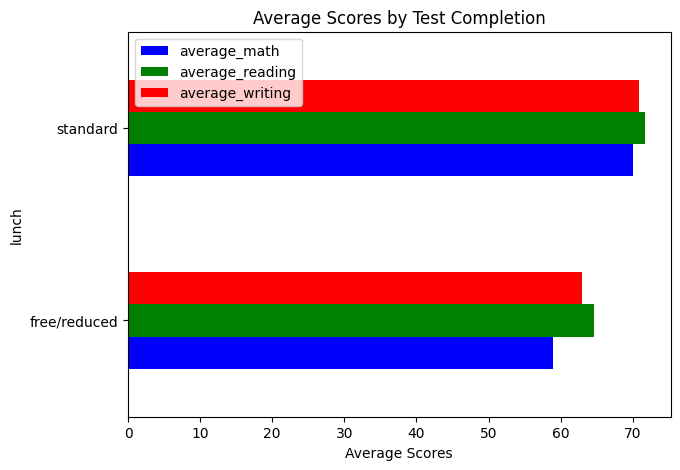

In [ ]:
dfstd1a.set_index('lunch', inplace=True)

ax = dfstd1a.plot(kind='barh', figsize=(7, 5), color=['b', 'g', 'r'])
ax.set_title('Average Scores by Test Completion')
ax.set_xlabel('Average Scores')
ax.legend(loc='upper left')

plt.show()


In [ ]:
dfstd1a_min = dfstd1.groupby('lunch')[['math', 'reading', 'writing']].min()
dfstd1a_min.columns = ['min_math','min_reading','min_writing']
dfstd1a_min = dfstd1a_min.reset_index()
dfstd1a_min

,lunch,min_math,min_reading,min_writing
0,free/reduced,0,17,10
1,standard,19,26,22


In [ ]:
dfstd1a_max = dfstd1.groupby('lunch')[['math', 'reading', 'writing']].max()
dfstd1a_max.columns = ['max_math','max_reading','max_writing']
dfstd1a_max = dfstd1a_max.reset_index()
dfstd1a_max

,lunch,max_math,max_reading,max_writing
0,free/reduced,100,100,100
1,standard,100,100,100


###Analisa Preparation Test mempengaruhi Performa Siswa

Kemudian kita lakukan analisa kedua, dimana kita ingin melihat apakah preparation test dapat memberikan pengaruh positif kepada student.

In [ ]:
dfstd1b = dfstd1.groupby('test')[['math', 'reading', 'writing']].mean()
dfstd1b.columns = ['average_math','average_reading','average_writing']
dfstd1b = dfstd1b.reset_index()
dfstd1b

,test,average_math,average_reading,average_writing
0,completed,69.695531,73.893855,74.418994
1,none,64.077882,66.534268,64.504673


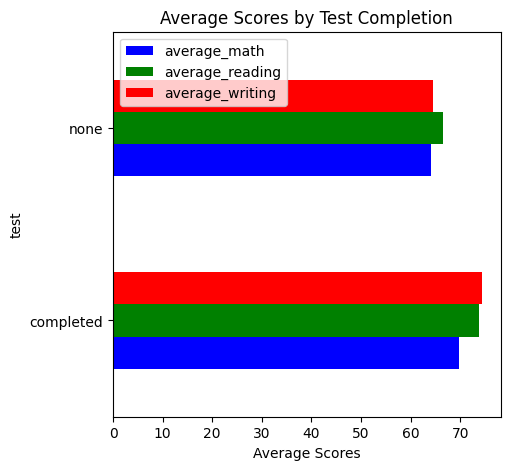

In [ ]:
dfstd1b.set_index('test', inplace=True)

ax = dfstd1b.plot(kind='barh', figsize=(5, 5), color=['b', 'g', 'r'])
ax.set_title('Average Scores by Test Completion')
ax.set_xlabel('Average Scores')
ax.legend(loc='upper left')

plt.show()


In [ ]:
dfstd1b_min = dfstd1.groupby('test')[['math', 'reading', 'writing']].min()
dfstd1b_min.columns = ['min_math','min_reading','min_writing']
dfstd1b_min = dfstd1b_min.reset_index()
dfstd1b_min

,test,min_math,min_reading,min_writing
0,completed,23,37,36
1,none,0,17,10


In [ ]:
dfstd1b_max = dfstd1.groupby('test')[['math', 'reading', 'writing']].max()
dfstd1b_max.columns = ['max_math','max_reading','max_writing']
dfstd1b_max = dfstd1b_max.reset_index()
dfstd1b_max

,test,max_math,max_reading,max_writing
0,completed,100,100,100
1,none,100,100,100


###Result 1
Berdasarkan hasil analisa terhadap 2 faktor terhadap siswa pada tahun 2022-2023, kita dapat menyimpulkan bahwa :

1. Siswa yang mengambil test preparation secara rata-rata memiliki nilai yang lebih baik dalam seluruh mata pelajaran yang diuji
2. Siswa yang mengambil test preparation test juga memiliki nilai minimum lebih tinggi daripada nilai minimum siswa yang tidak mengambil test preparation 
3. Siswa yang mendapatkan makan siang standar secara rata-rata memiliki nilai yang lebih baik dalam seluruh mata pelajaran yang diuji
4. Siswa yang mendapatkan makan siang standar juga memiliki nilai minimum lebih tinggi daripada nilai minimum siswa yang mendapatkan makan siang gratis dan/atau dikurangi standarnya
5. Meskipun secara rata-rata dan nilai minimum siswa yang mengambil test preparation dan mendapatkan makan siang yang lebih baik lebih tinggi daripada yang tidak, namun terdapat juga siswa yang tidak mendapatkan makan siang standar dan tidak mengambil test preparation yang mendapatkan nilai sempurna, yaitu 100 untuk mata pelajaran yang diuji

Kesimpulan : ***Siswa sebaiknya mengikuti test preparation dan mendapatkan asupan makan siang yang baik untuk memperbesar peluang mendapatkan nilai yang lebih baik***

##Question - 2

Dalam menentukan calon mahasiswa yang lolos seleksi masuk universitas, tingkat pendidikan orang tua menjadi salah satu variabel yang digunakan dalam pertimbangan. Asumsi yang berlaku selama ini adalah semakin tinggi tingkat pendidikan orang tua, maka seorang calon mahasiswa berpotensi tinggi kelak menjadi mahasiswa berprestasi.

***Jika dilihat berdasarkan data, apakah asumsi tersebut dapat dianggap benar?***

###Analisa rata-rata

In [ ]:
dfstd2 = dfstd.loc[:, ('parents', 'math', 'reading', 'writing')]
dfstd2.head()

,parents,math,reading,writing
0,bachelor's degree,72,72,74
1,some college,69,90,88
2,master's degree,90,95,93
3,associate's degree,47,57,44
4,some college,76,78,75


In [ ]:
dfstd2a = dfstd2.groupby('parents')[['math', 'reading', 'writing']].mean()
dfstd2a.columns = ['average_math','average_reading','average_writing']
dfstd2a = dfstd2a.reset_index()
dfstd2a

,parents,average_math,average_reading,average_writing
0,associate's degree,67.882883,70.927928,69.896396
1,bachelor's degree,69.389831,73.000000,73.381356
2,high school,62.137755,64.704082,62.448980
3,master's degree,69.745763,75.372881,75.677966
4,some college,67.128319,69.460177,68.840708
5,some high school,63.497207,66.938547,64.888268


In [ ]:
dfstd2a['average_score'] = dfstd2a[['average_math', 'average_reading', 'average_writing']].mean(axis=1)

In [ ]:
dfstd2a = dfstd2a.loc[[3, 1, 0, 4, 2, 5], :]
dfstd2a = dfstd2a.reset_index()
dfstd2a.drop('index',axis=1,inplace=True)
dfstd2a

,parents,average_math,average_reading,average_writing,average_score
0,master's degree,69.745763,75.372881,75.677966,73.598870
1,bachelor's degree,69.389831,73.000000,73.381356,71.923729
2,associate's degree,67.882883,70.927928,69.896396,69.569069
3,some college,67.128319,69.460177,68.840708,68.476401
4,high school,62.137755,64.704082,62.448980,63.096939
5,some high school,63.497207,66.938547,64.888268,65.108007


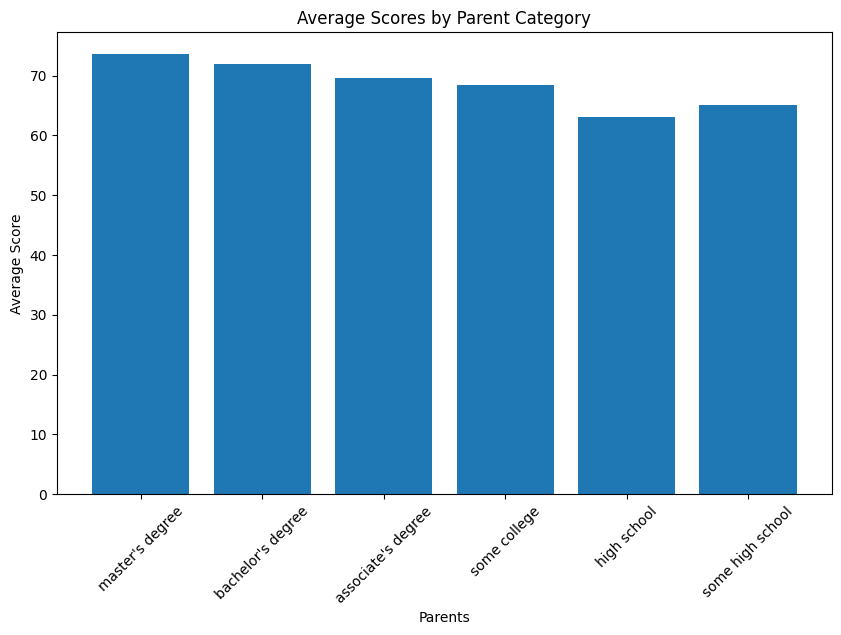

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(dfstd2a['parents'], dfstd2a['average_score'])
plt.xlabel('Parents')
plt.ylabel('Average Score')
plt.title('Average Scores by Parent Category')
plt.xticks(rotation=45)
plt.show()

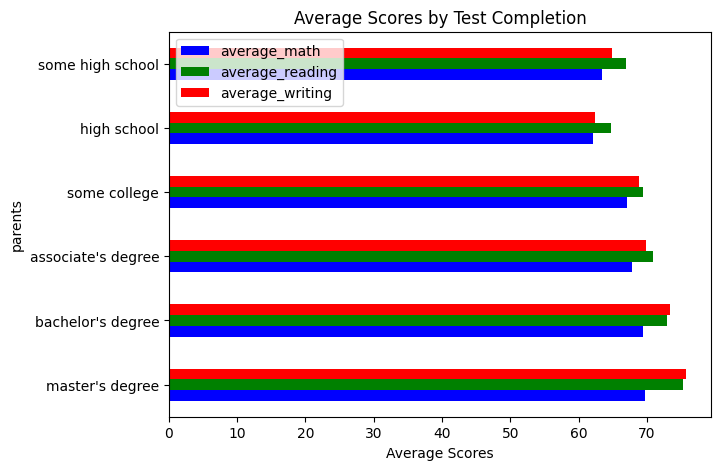

In [ ]:
dfstd2a.set_index('parents', inplace=True)

ax = dfstd2a.plot(kind='barh', figsize=(7, 5), color=['b', 'g', 'r'])
ax.set_title('Average Scores by Test Completion')
ax.set_xlabel('Average Scores')
ax.legend(loc='upper left')

plt.show()


###Analisa max min

In [ ]:
dfstd2_min = dfstd2.groupby('parents')[['math', 'reading', 'writing']].min()
dfstd2_min.columns = ['min_math','min_reading','min_writing']
dfstd2_min = dfstd2_min.reset_index()
dfstd2_min

,parents,min_math,min_reading,min_writing
0,associate's degree,26,31,35
1,bachelor's degree,29,41,38
2,high school,8,24,15
3,master's degree,40,42,46
4,some college,19,23,19
5,some high school,0,17,10


In [ ]:
dfstd2_min = dfstd2_min.loc[[3, 1, 0, 4, 2, 5], :]
dfstd2_min = dfstd2_min.reset_index()
dfstd2_min.drop('index',axis=1,inplace=True)
dfstd2_min

,parents,min_math,min_reading,min_writing
0,master's degree,40,42,46
1,bachelor's degree,29,41,38
2,associate's degree,26,31,35
3,some college,19,23,19
4,high school,8,24,15
5,some high school,0,17,10


In [ ]:
dfstd2_max = dfstd2.groupby('parents')[['math', 'reading', 'writing']].max()
dfstd2_max.columns = ['max_math','max_reading','max_writing']
dfstd2_max = dfstd2_max.reset_index()
dfstd2_max

,parents,max_math,max_reading,max_writing
0,associate's degree,100,100,100
1,bachelor's degree,100,100,100
2,high school,99,99,100
3,master's degree,95,100,100
4,some college,100,100,99
5,some high school,97,100,100


In [ ]:
dfstd2_max = dfstd2_max.loc[[3, 1, 0, 4, 2, 5], :]
dfstd2_max = dfstd2_max.reset_index()
dfstd2_max.drop('index',axis=1,inplace=True)
dfstd2_max

,parents,max_math,max_reading,max_writing
0,master's degree,95,100,100
1,bachelor's degree,100,100,100
2,associate's degree,100,100,100
3,some college,100,100,99
4,high school,99,99,100
5,some high school,97,100,100


In [ ]:
dfcek = dfstd2[dfstd2['math'] == 97]
dfcek

,parents,math,reading,writing
34,some college,97,87,82
179,some high school,97,100,100
286,associate's degree,97,82,88
539,associate's degree,97,92,86
855,bachelor's degree,97,97,96
864,associate's degree,97,93,91


In [ ]:
dfcek1 = dfstd2[dfstd2['math'] == 95]
dfcek1

,parents,math,reading,writing
503,associate's degree,95,89,92
618,master's degree,95,81,84


###Result 2

Berdasarkan hasil pengolahan data, dengan asumsi some college berarti orang tua siswa memiliki pendidikan terakhir setara dengan diploma dan/atau tidak menyelesaikan program diploma mereka dan some high school menandakan orang tua dari siswa memiliki pendidikan tertinggi terakhir setara SMA (SMK, dll) dan/tidak menyelesaikan pendidikan SMA mereka, maka dapat ditemukan :    


1.   Secara rata-rata, peringkat pendidikan terakhir orang tua akan mempengaruhi skor siswa
2.   Dalam analisa nilai minimum, ditemukan hasil bahwa semakin tinggi pendidikan orang tua, maka nilai minimum yang didapatkan pada setiap mata pelajaran semakin tinggi
3.   Hal menarik ditemukan dalam analisa nilai maximum, dimana tingkat pendidikan orang tua hampir tidak memiliki pengaruh terhadap nilai maximum yang dapat dicapai, dimana nilai tertinggi yang diterima siswa dengan orang tua Master's Degree untuk mata pelajaran Math hanya 95, namun siswa dengan orang tua High School mampu mendapat nilai 99. Pendapat ini diperkuat dengan 2 analisa tambahan

Kesimpulan :  ***Siswa yang memiliki orang tua dengan pendidikan tinggi secara umum akan memiliki kesempatan untuk mendapatkan nilai yang lebih baik dalam mata pelajaran yang diuji, namun terdapat faktor-faktor lain yang dapat mempengaruhi hasil akhir seorang siswa***


##Question - 3

Terdapat 3 komponen utama nilai mahasiswa, yaitu math score, reading score, dan writing score.

***Apakah 3 komponen tersebut relevan jika digunakan dalam mengestimasi ranking suatu universitas?***

Kali ini kita menggunakan 2 dataframe, yaitu df2022 dan dfstd.
Hal ini karena dfstd merupakan data 2021-2022, sehingga sesuai dengan df2022

In [ ]:
df2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   rank_2022                    888 non-null    object
 1   rank_2021                    888 non-null    object
 2   institution                  888 non-null    object
 3   country                      888 non-null    object
 4   classification               888 non-null    object
 5   focus                        888 non-null    object
 6   research_intensity           888 non-null    object
 7   age                          888 non-null    int64 
 8   status                       888 non-null    object
 9   academic_reputation_score    888 non-null    object
 10  academic_reputation_rank     888 non-null    object
 11  employer_reputation_score    888 non-null    object
 12  employer_reputation_rank     888 non-null    object
 13  faculty_student_score        888 no

In [ ]:
dfstd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   gender      1000 non-null   object
 1   race        1000 non-null   object
 2   parents     1000 non-null   object
 3   lunch       1000 non-null   object
 4   test        1000 non-null   object
 5   math        1000 non-null   int64 
 6   reading     1000 non-null   int64 
 7   writing     1000 non-null   int64 
 8   university  1000 non-null   object
 9   student_id  1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


###Analisa rata-rata skor

Pertama, kita akan group by university dari dfstd untuk melihat rata-rata skor pada setiap mata pelajaran yang diuji

In [ ]:
dfstd3 = dfstd.loc[:, ('university', 'math', 'reading', 'writing')]
dfstd3.head()

,university,math,reading,writing
0,University of Essex,72,72,74
1,National Central University,69,90,88
2,Université de Montpellier,90,95,93
3,Washington State University,47,57,44
4,Keele University,76,78,75


In [ ]:
dfstd3a = dfstd3.groupby('university')[['math', 'reading', 'writing']].mean()
dfstd3a.columns = ['average_math','average_reading','average_writing']
dfstd3a = dfstd3a.reset_index()
dfstd3a.head()

,university,average_math,average_reading,average_writing
0,Aalborg University,63.000000,78.000000,79.0
1,Aalto University,47.000000,57.000000,53.0
2,Aarhus University,50.000000,67.000000,63.0
3,Aberystwyth University,43.500000,51.000000,44.5
4,Abo Akademi University,71.333333,72.666667,70.0


In [ ]:
dfstd3a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   university       598 non-null    object 
 1   average_math     598 non-null    float64
 2   average_reading  598 non-null    float64
 3   average_writing  598 non-null    float64
dtypes: float64(3), object(1)
memory usage: 18.8+ KB


Setelah mendapatkan nilai rata-rata setiap mata pelajaran yang diuji pada setiap Universitas, selanjutnya kita munculkan jumlah siswa pada setiap Universitas yang terdapat pada data yang dimiliki

In [ ]:
num_of_std = dfstd3.groupby('university')['math'].count()
dfstd3a = dfstd3a.merge(num_of_std, on='university', how='left')
dfstd3a = dfstd3a.rename(columns={'math':'#student'})
dfstd3a.head()

,university,average_math,average_reading,average_writing,#student
0,Aalborg University,63.000000,78.000000,79.0,1
1,Aalto University,47.000000,57.000000,53.0,2
2,Aarhus University,50.000000,67.000000,63.0,1
3,Aberystwyth University,43.500000,51.000000,44.5,2
4,Abo Akademi University,71.333333,72.666667,70.0,3


###Perbandingan Ranking

Selanjutnya, kita ambil data ranking Universitas pada tahun 2022

In [ ]:
dfstd3a = dfstd3a.merge(df2022[['institution', 'rank_2022']], left_on='university', right_on='institution', how='left')
dfstd3a

,university,average_math,average_reading,average_writing,#student,institution,rank_2022
0,Aalborg University,63.000000,78.000000,79.000000,1,Aalborg University,324=
1,Aalto University,47.000000,57.000000,53.000000,2,Aalto University,134
2,Aarhus University,50.000000,67.000000,63.000000,1,Aarhus University,145
3,Aberystwyth University,43.500000,51.000000,44.500000,2,Aberystwyth University,484=
4,Abo Akademi University,71.333333,72.666667,70.000000,3,Abo Akademi University,541-550
...,...,...,...,...,...,...,...
593,Yamaguchi University,73.000000,76.000000,71.500000,2,Yamaguchi University,701-750
594,Yeungnam University,53.500000,66.500000,61.000000,2,Yeungnam University,801-1000
595,Yokohama City University,64.500000,71.000000,68.500000,2,Yokohama City University,468=
596,York University,65.714286,69.142857,69.142857,7,York University,511-520


Kemudian kita munculkan nilai rata-rata mata pelajaran yang diuji pada setiap Universitas.

In [ ]:
dfstd3a['average_score'] = (dfstd3a['average_math'] + dfstd3a['average_reading'] + dfstd3a['average_writing']) / 3
order = ['university', 'average_math', 'average_reading', 'average_writing', 'average_score', '#student', 'institution', 'rank_2022']
dfstd3a = dfstd3a.reindex(columns=order)
dfstd3a

,university,average_math,average_reading,average_writing,average_score,#student,institution,rank_2022
0,Aalborg University,63.000000,78.000000,79.000000,73.333333,1,Aalborg University,324=
1,Aalto University,47.000000,57.000000,53.000000,52.333333,2,Aalto University,134
2,Aarhus University,50.000000,67.000000,63.000000,60.000000,1,Aarhus University,145
3,Aberystwyth University,43.500000,51.000000,44.500000,46.333333,2,Aberystwyth University,484=
4,Abo Akademi University,71.333333,72.666667,70.000000,71.333333,3,Abo Akademi University,541-550
...,...,...,...,...,...,...,...,...
593,Yamaguchi University,73.000000,76.000000,71.500000,73.500000,2,Yamaguchi University,701-750
594,Yeungnam University,53.500000,66.500000,61.000000,60.333333,2,Yeungnam University,801-1000
595,Yokohama City University,64.500000,71.000000,68.500000,68.000000,2,Yokohama City University,468=
596,York University,65.714286,69.142857,69.142857,68.000000,7,York University,511-520


Kemudian kita membuat ranking setiap Universitas berdasarkan data rata-rata skor

In [ ]:
dfstd3a['average_score_rank'] = dfstd3a['average_score'].rank(method='dense', ascending=False).astype(int)
dfstd3a.sort_values('average_score_rank')

,university,average_math,average_reading,average_writing,average_score,#student,institution,rank_2022,average_score_rank
190,Monash University,100.0,100.0,100.0,100.000000,1,Monash University,58=,1
149,Keio University,100.0,100.0,100.0,100.000000,1,Keio University,200=,1
477,University of Oklahoma,99.0,100.0,100.0,99.666667,1,University of Oklahoma,571-580,2
407,University of Birmingham,94.0,99.0,100.0,97.666667,1,University of Birmingham,81,3
113,ITMO University,92.0,100.0,97.0,96.333333,1,ITMO University,436=,4
...,...,...,...,...,...,...,...,...,...
318,The University of Sheffield,29.0,40.0,44.0,37.666667,1,The University of Sheffield,78=,274
360,Universidad de la Habana,36.0,29.0,27.0,30.666667,1,Universidad de la Habana,501-510,275
38,Birla Institute of Technology and Science,35.0,28.0,27.0,30.000000,1,Birla Institute of Technology and Science,801-1000,276
52,Case Western Reserve University,30.0,26.0,22.0,26.000000,1,Case Western Reserve University,167,277


In [ ]:
dfstd3a.describe()

,average_math,average_reading,average_writing,average_score,#student,average_score_rank
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,66.194004,69.368550,68.282346,67.948300,1.672241,132.826087
std,12.962374,12.267389,12.870217,12.082473,0.842505,73.552747
min,0.000000,17.000000,10.000000,9.000000,1.000000,1.000000
25%,58.000000,61.812500,61.000000,60.666667,1.000000,72.000000
50%,66.000000,70.000000,69.000000,68.861111,1.000000,127.500000
75%,74.250000,77.458333,76.500000,75.500000,2.000000,193.000000
max,100.000000,100.000000,100.000000,100.000000,7.000000,278.000000


###Result 3

Berdasarkan hasil yang didapatkan, maka kita dapat berasumsi bahwa ketiga komponen, yaitu hasil math, reading, dan writing tidak dapat kita gunakan sebagai acuan untuk menentukan estimasi ranking suatu universitas.

Namun perlu diperhatikan juga bahwa data yang didapat sangat sedikit, dimana setiap Universitas hanya memiliki 1 hingga 7 perwakilan, sehingga hasil analisa tidak dapat dikatakan valid

##Question 4

Untuk Question 4, kita akan melihat Top 3 Student dan Bottom 3 Student berdadsarkan data yang dimiliki.

Pada analisa nomor 3, kita sudah melihat bahwa top 3 student terdapat pada
1. Monash University
2. Keio University
3. University of Oklahoma 

Sedangkan bottom 3 terdapat pada :
1. Birla Institute of Technology and Science
2. Case Western Reserve University
3. University of Colorado at Denver

Kita dapat mengasumsikan hal ini karena keenam Universitas berada pada Top 3 dan Bottom 3, serta masing-masing diwakili oleh 1 student saja

##Question 5

Kemudian untuk Analisa nomor 5, kita akan melihat apakah gender mempengaruhi nilai dari student

In [ ]:
dfstd5 = dfstd.loc[:, ('gender', 'math', 'reading', 'writing')]
dfstd5.head()

,gender,math,reading,writing
0,female,72,72,74
1,female,69,90,88
2,female,90,95,93
3,male,47,57,44
4,male,76,78,75


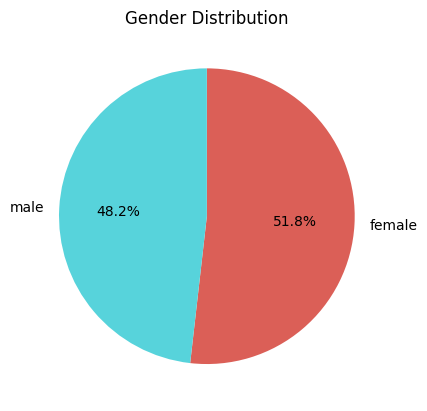

In [ ]:
dfstd5_count = dfstd5['gender'].value_counts()
fig, ax = plt.subplots()
ax.pie(dfstd5_count.values, labels=dfstd5_count.index, autopct='%1.1f%%',
       startangle=90, counterclock=False)
ax.set_title('Gender Distribution')

plt.show()

Karena persebaran data antara gender Male dan Female cukup merata, maka kita akan lakukan analisa lebih lanjut

###Analisa rata-rata dan max-min

In [ ]:
dfstd5a = dfstd5.groupby('gender')[['math', 'reading', 'writing']].mean()
dfstd5a.columns = ['average_math','average_reading','average_writing']
dfstd5a = dfstd5a.reset_index()
dfstd5a

,gender,average_math,average_reading,average_writing
0,female,63.633205,72.608108,72.467181
1,male,68.728216,65.473029,63.311203


In [ ]:
dfstd5a_max = dfstd5.groupby('gender')[['math', 'reading', 'writing']].max()
dfstd5a_max.columns = ['average_math','average_reading','average_writing']
dfstd5a_max = dfstd5a_max.reset_index()
dfstd5a_max

,gender,average_math,average_reading,average_writing
0,female,100,100,100
1,male,100,100,100


In [ ]:
dfstd5a_min = dfstd5.groupby('gender')[['math', 'reading', 'writing']].min()
dfstd5a_min.columns = ['average_math','average_reading','average_writing']
dfstd5a_min = dfstd5a_min.reset_index()
dfstd5a_min

,gender,average_math,average_reading,average_writing
0,female,0,17,10
1,male,27,23,15


In [ ]:
dfstd5[(dfstd5['math'] == 100) & (dfstd5['gender'] == 'male')].sort_values('math')

,gender,math,reading,writing
149,male,100,100,93
623,male,100,96,86
625,male,100,97,99
916,male,100,100,100


In [ ]:
dfstd5[(dfstd5['math'] == 100) & (dfstd5['gender'] == 'female')].sort_values('math')

,gender,math,reading,writing
451,female,100,92,97
458,female,100,100,100
962,female,100,100,100


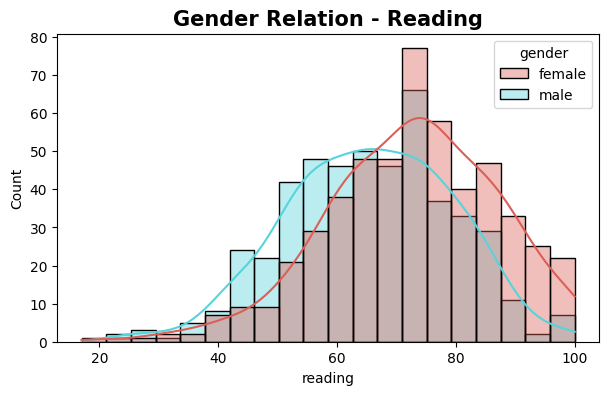

In [ ]:
plt.figure(figsize=(7, 4))
sns.set_palette('hls',2)
plt.title('Gender Relation - Reading', fontsize=15, fontweight='bold', )


sns.histplot(data=dfstd5,x='reading',kde=True,hue='gender', bins=20, alpha=0.4)
plt.show()

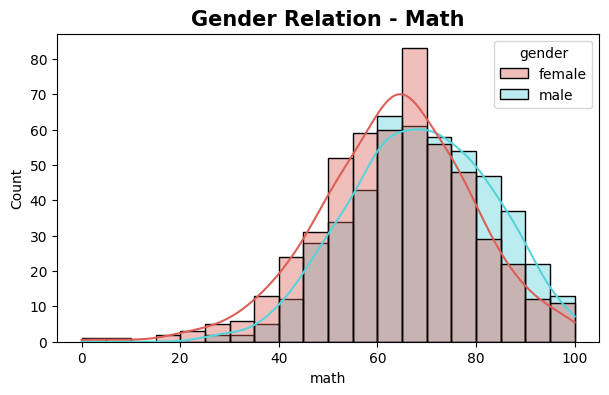

In [ ]:
plt.figure(figsize=(7, 4))
sns.set_palette('hls',2)
plt.title('Gender Relation - Math', fontsize=15, fontweight='bold', )


sns.histplot(data=dfstd5,x='math',kde=True,hue='gender', bins=20, alpha=0.4)
plt.show()

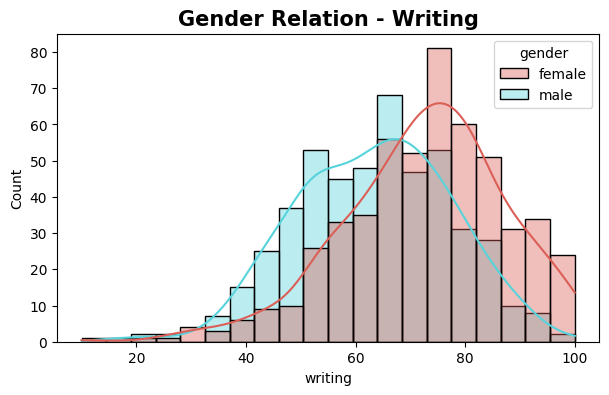

In [ ]:
plt.figure(figsize=(7, 4))
sns.set_palette('hls',2)
plt.title('Gender Relation - Writing', fontsize=15, fontweight='bold', )


sns.histplot(data=dfstd5,x='writing',kde=True,hue='gender', bins=20, alpha=0.4)
plt.show()

###Result 5

Berdasarkan hasil analisa, kita menemukan bahwa secara keseluruhan, mahasiswa berjenis kelamin laki-laki memiliki nilai yang lebih baik pada math, namun mahasiswa dengan jenis kelamin wanita memiliki nilai lebih baik pada reading dan writing.

Pada analisa max dan min, kita menemukan meskipun secara keseluruhan mahasiswa berjenis kelamin wanita memiliki nilai rata-rata writing dan reading yang lebih baik, namun nilai minimum yang dimiliki oleh laki-laki pada setiap mata pelajaran yang diuji lebih tinggi daripada nilai minimum wanita.

***Kesimpulan : Jenis kelamin tidak dapat dikatakan sepenuhnya mempengaruhi nilai seorang mahasiswa, namun secara umum laki-laki lebih baik dalam mata pelajaran math, sedangkan wanita pada reading dan writing***

#Machine Learning - ranking universitas

Kali ini kita akan membuat model machine learning yang memungkin mesin untuk mengeluarkan rekomendasi ranking sebuah Universitas berdasarkan data-data yang telah dikumpulkan

##Data Cleaning

###DF2018

In [ ]:
df2018.head()

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100,...,4,100,14,99.9,8,100,36,96.1,70,100
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100,...,5,100,12,99.4,12,99.6,54,72.7,177,98.7
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100,...,3,98.3,38,99.9,9,96.5,103,75.2,165,98.4
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,99.5,...,77,100,3,100,4,93.4,126,89.2,106,97.7
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,100,...,1,100,10,78.3,75,97.4,87,97.7,57,95.6


In [ ]:
df2018.isna().any()

rank_2018                      False
rank_2017                      False
institution                    False
country                        False
classification                 False
focus                          False
research_intensity             False
age                            False
status                         False
academic_reputation_score      False
academic_reputation_rank       False
employer_reputation_score      False
employer_reputation_rank       False
faculty_student_score          False
faculty_student_rank           False
citations_score                False
citations_rank                 False
international_faculty_score    False
international_faculty_rank     False
international_student_score    False
international_student_rank     False
overall_score                  False
dtype: bool

In [ ]:
df2018.duplicated().any()

False

In [ ]:
df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   rank_2018                    895 non-null    object
 1   rank_2017                    895 non-null    object
 2   institution                  895 non-null    object
 3   country                      895 non-null    object
 4   classification               895 non-null    object
 5   focus                        895 non-null    object
 6   research_intensity           895 non-null    object
 7   age                          895 non-null    int64 
 8   status                       895 non-null    object
 9   academic_reputation_score    895 non-null    object
 10  academic_reputation_rank     895 non-null    object
 11  employer_reputation_score    895 non-null    object
 12  employer_reputation_rank     895 non-null    object
 13  faculty_student_score        895 no

Dari kolom yang ada, kita akan menghilangkan beberapa kolom. Dari dataframe df2018, kita akan drop kolom-kolom berikut:
1. rank_2017 - data yang digunakan adalan rank_2018
2. institution - institution kita asumsikan tidak menjadi faktor yang menentukan ranking
3. country - country kita asumsikan tidak menjadi faktor yang menentukan ranking
4. academic_reputation_rank - kita akan menggunakan score, bukan rank
5. employer_reputation_rank - kita akan menggunakan score, bukan rank
6. faculty_student_rank - kita akan menggunakan score, bukan rank
7. citations_rank - kita akan menggunakan score, bukan rank
8. international_faculty_rank - kita akan menggunakan score, bukan rank
9. international_student_rank - kita akan menggunakan score, bukan rank
10. overall_score - Overall score didapat dari perhitungan faktor2 sebelumnya. Dalam pemodelan, kita tidak akan menggunakan overall_score karena faktor2 sebelumnya akan menentukan score

In [ ]:
df2018.drop(columns=['rank_2017','institution','country','academic_reputation_rank','employer_reputation_rank','faculty_student_rank','citations_rank','international_faculty_rank','international_student_rank','overall_score'],inplace=True)
df2018

,rank_2018,classification,focus,research_intensity,age,status,academic_reputation_score,employer_reputation_score,faculty_student_score,citations_score,international_faculty_score,international_student_score
0,1,M,CO,VH,5,B,100,100,100,99.9,100,96.1
1,2,L,FC,VH,5,B,100,100,100,99.4,99.6,72.7
2,3,L,FC,VH,5,B,100,100,98.3,99.9,96.5,75.2
3,4,S,CO,VH,5,B,99.5,85.4,100,100,93.4,89.2
4,5,L,FC,VH,5,A,100,100,100,78.3,97.4,97.7
...,...,...,...,...,...,...,...,...,...,...,...,...
890,801-1000,L,CO,VH,5,A,-,-,-,-,-,-
891,801-1000,L,FC,HI,3,A,-,-,-,-,-,-
892,801-1000,L,CO,MD,4,A,-,-,-,-,-,-
893,801-1000,M,FO,HI,4,A,-,-,-,-,-,-


Karena kolom rank_2018 memiliki tipe data object, maka kita akan coba temukan baris-baris yang tidak berupa integer

In [ ]:
df2018_str = df2018[df2018['rank_2018'].astype(str).str.contains('[^0-9-]')]
df2018_str

,rank_2018,classification,focus,research_intensity,age,status,academic_reputation_score,employer_reputation_score,faculty_student_score,citations_score,international_faculty_score,international_student_score
20,21=,L,FC,VH,5,B,94,78.1,98.1,91.4,14.2,56.6
21,21=,XL,FC,VH,5,A,99.7,92.2,89.6,66.7,78,51.2
22,23=,L,FC,VH,5,A,92.8,92.4,87.6,64.8,97.4,99.2
23,23=,L,FC,VH,5,A,99.1,96.6,83.2,55.5,94.9,98.6
27,28=,L,FC,VH,5,B,91.3,76.6,98.6,75.4,57.9,55
...,...,...,...,...,...,...,...,...,...,...,...,...
890,801-1000,L,CO,VH,5,A,-,-,-,-,-,-
891,801-1000,L,FC,HI,3,A,-,-,-,-,-,-
892,801-1000,L,CO,MD,4,A,-,-,-,-,-,-
893,801-1000,M,FO,HI,4,A,-,-,-,-,-,-


Kemudian kita akan menghilangkan '=' dari rank_2018

In [ ]:
df2018['rank_2018'] = df2018['rank_2018'].str.replace('=', '')
df2018

,rank_2018,classification,focus,research_intensity,age,status,academic_reputation_score,employer_reputation_score,faculty_student_score,citations_score,international_faculty_score,international_student_score
0,1,M,CO,VH,5,B,100,100,100,99.9,100,96.1
1,2,L,FC,VH,5,B,100,100,100,99.4,99.6,72.7
2,3,L,FC,VH,5,B,100,100,98.3,99.9,96.5,75.2
3,4,S,CO,VH,5,B,99.5,85.4,100,100,93.4,89.2
4,5,L,FC,VH,5,A,100,100,100,78.3,97.4,97.7
...,...,...,...,...,...,...,...,...,...,...,...,...
890,801-1000,L,CO,VH,5,A,-,-,-,-,-,-
891,801-1000,L,FC,HI,3,A,-,-,-,-,-,-
892,801-1000,L,CO,MD,4,A,-,-,-,-,-,-
893,801-1000,M,FO,HI,4,A,-,-,-,-,-,-


Karena terdapat banyak data yang menggunakan range, misalnya 801-1000, maka akan kita hilangkan dari dataframe dan dikeluarkan dari model, kemudian kita akan ubah tipe data pada kolom rank_2018 menjadi integer dan kita ubah kolom 'rank_2018' menjadi 'rank'

In [ ]:
df2018 = df2018[~df2018['rank_2018'].str.contains('-')]
df2018['rank_2018'] = df2018['rank_2018'].astype(int)
df2018 = df2018.rename(columns={'rank_2018':'rank'})
df2018

,rank,classification,focus,research_intensity,age,status,academic_reputation_score,employer_reputation_score,faculty_student_score,citations_score,international_faculty_score,international_student_score
0,1,M,CO,VH,5,B,100,100,100,99.9,100,96.1
1,2,L,FC,VH,5,B,100,100,100,99.4,99.6,72.7
2,3,L,FC,VH,5,B,100,100,98.3,99.9,96.5,75.2
3,4,S,CO,VH,5,B,99.5,85.4,100,100,93.4,89.2
4,5,L,FC,VH,5,A,100,100,100,78.3,97.4,97.7
...,...,...,...,...,...,...,...,...,...,...,...,...
388,395,M,CO,VH,5,B,23.6,13.9,19,49.7,21.4,100
389,397,L,CO,MD,4,B,18.7,31.5,78.3,2.1,37.9,39
390,398,M,FO,VH,5,A,27.3,13.2,25.5,19.7,85,97.2
391,398,XL,FC,HI,5,A,27.9,25.2,48.7,20.1,35.1,24.6


###DF2019

In [ ]:
df2019.head()

,rank_2019,rank_2018,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100,...,4,100,17,99.8,8,100,41,95.5,77,100
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100,...,5,100,16,99,13,99.8,56,70.5,190,98.6
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100,...,1,99.3,40,99.8,9,92.1,151,75.7,164,98.5
3,4,4,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,98.7,...,72,100,4,100,5,96.8,115,90.3,103,97.2
4,5,6,UNIVERSITY OF OXFORD,United Kingdom,L,FC,VH,5,A,100,...,3,100,7,83,56,99.6,63,98.8,43,96.8


In [ ]:
df2019.duplicated().any()

False

In [ ]:
df2019.isna().any()

rank_2019                      False
rank_2018                      False
institution                    False
country                        False
classification                 False
focus                          False
research_intensity             False
age                            False
status                         False
academic_reputation_score      False
academic_reputation_rank       False
employer_reputation_score      False
employer_reputation_rank       False
faculty_student_score          False
faculty_student_rank           False
citations_score                False
citations_rank                 False
international_faculty_score    False
international_faculty_rank     False
international_student_score    False
international_student_rank     False
overall_score                  False
dtype: bool

In [ ]:
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   rank_2019                    895 non-null    object
 1   rank_2018                    895 non-null    object
 2   institution                  895 non-null    object
 3   country                      895 non-null    object
 4   classification               895 non-null    object
 5   focus                        895 non-null    object
 6   research_intensity           895 non-null    object
 7   age                          895 non-null    int64 
 8   status                       895 non-null    object
 9   academic_reputation_score    895 non-null    object
 10  academic_reputation_rank     895 non-null    object
 11  employer_reputation_score    895 non-null    object
 12  employer_reputation_rank     895 non-null    object
 13  faculty_student_score        895 no

In [ ]:
df2019.drop(columns=['rank_2018','institution','country','academic_reputation_rank','employer_reputation_rank','faculty_student_rank','citations_rank','international_faculty_rank','international_student_rank','overall_score'],inplace=True)
df2019

,rank_2019,classification,focus,research_intensity,age,status,academic_reputation_score,employer_reputation_score,faculty_student_score,citations_score,international_faculty_score,international_student_score
0,1,M,CO,VH,5,B,100,100,100,99.8,100,95.5
1,2,L,FC,VH,5,B,100,100,100,99,99.8,70.5
2,3,L,FC,VH,5,B,100,100,99.3,99.8,92.1,75.7
3,4,S,CO,VH,5,B,98.7,81.2,100,100,96.8,90.3
4,5,L,FC,VH,5,A,100,100,100,83,99.6,98.8
...,...,...,...,...,...,...,...,...,...,...,...,...
890,801-1000,L,FC,HI,3,A,-,-,-,26.4,-,-
891,801-1000,L,CO,MD,5,A,-,-,40.2,-,-,18.1
892,801-1000,M,FO,HI,4,A,-,-,-,-,28.1,-
893,801-1000,L,FO,HI,4,A,-,-,-,-,-,-


In [ ]:
df2019_str = df2019[df2019['rank_2019'].astype(str).str.contains('[^0-9-]')]
df2019_str

,rank_2019,classification,focus,research_intensity,age,status,academic_reputation_score,employer_reputation_score,faculty_student_score,citations_score,international_faculty_score,international_student_score
57,59=,XL,FC,VH,4,A,86.7,93.1,15.3,65.9,100,99
58,59=,XL,FC,VH,5,A,77.8,96.1,39.4,85,77.4,15.6
67,69=,L,CO,VH,5,A,73.5,74.6,23.5,100,42.4,70.9
68,69=,L,FC,VH,5,A,70.4,59.6,60.7,57.2,94.3,96.7
73,75=,L,FC,VH,5,A,61,64.1,64.5,58.8,88.9,94.2
...,...,...,...,...,...,...,...,...,...,...,...,...
890,801-1000,L,FC,HI,3,A,-,-,-,26.4,-,-
891,801-1000,L,CO,MD,5,A,-,-,40.2,-,-,18.1
892,801-1000,M,FO,HI,4,A,-,-,-,-,28.1,-
893,801-1000,L,FO,HI,4,A,-,-,-,-,-,-


In [ ]:
df2019['rank_2019'] = df2019['rank_2019'].str.replace('=', '')
df2019 = df2019[~df2019['rank_2019'].str.contains('-')]
df2019['rank_2019'] = df2019['rank_2019'].astype(int)
df2019 = df2019.rename(columns={'rank_2019':'rank'})
df2019

,rank,classification,focus,research_intensity,age,status,academic_reputation_score,employer_reputation_score,faculty_student_score,citations_score,international_faculty_score,international_student_score
0,1,M,CO,VH,5,B,100,100,100,99.8,100,95.5
1,2,L,FC,VH,5,B,100,100,100,99,99.8,70.5
2,3,L,FC,VH,5,B,100,100,99.3,99.8,92.1,75.7
3,4,S,CO,VH,5,B,98.7,81.2,100,100,96.8,90.3
4,5,L,FC,VH,5,A,100,100,100,83,99.6,98.8
...,...,...,...,...,...,...,...,...,...,...,...,...
485,498,M,FO,VH,4,A,4.9,9.8,8.6,92.7,4.2,2.5
486,498,XL,FC,HI,3,A,15.9,26.4,9.9,25.9,100,47.8
487,500,M,SP,HI,2,A,12.7,29,13.8,21.2,100,69.4
488,500,M,FC,MD,5,B,7.7,26.9,68.1,2.3,62.2,10.2


###DF2022

In [ ]:
df2022.head()

,rank_2022,rank_2021,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5,B,100,...,4,100,15,99.8,7,100,43,94.1,87,100
1,2,2,Stanford University,United States,L,FC,VH,5,B,100,...,5,100,12,98.6,13,99.8,62,67.7,196,98.4
2,3,3,Harvard University,United States,L,FC,VH,5,B,100,...,1,98.7,40,99.6,8,86.3,186,62.2,221,97.4
3,4,5,University of Oxford,United Kingdom,L,FC,VH,5,A,100,...,3,100,8,84.7,45,99.7,64,98.5,50,97.2
4,5,4,California Institute of Technology (Caltech),United States,S,CO,VH,5,B,97.8,...,74,100,4,100,4,99.4,72,87.3,121,96.9


In [ ]:
df2022.duplicated().any()

False

In [ ]:
df2022.isna().any()

rank_2022                      False
rank_2021                      False
institution                    False
country                        False
classification                 False
focus                          False
research_intensity             False
age                            False
status                         False
academic_reputation_score      False
academic_reputation_rank       False
employer_reputation_score      False
employer_reputation_rank       False
faculty_student_score          False
faculty_student_rank           False
citations_score                False
citations_rank                 False
international_faculty_score    False
international_faculty_rank     False
international_student_score    False
international_student_rank     False
overall_score                  False
dtype: bool

In [ ]:
df2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   rank_2022                    888 non-null    object
 1   rank_2021                    888 non-null    object
 2   institution                  888 non-null    object
 3   country                      888 non-null    object
 4   classification               888 non-null    object
 5   focus                        888 non-null    object
 6   research_intensity           888 non-null    object
 7   age                          888 non-null    int64 
 8   status                       888 non-null    object
 9   academic_reputation_score    888 non-null    object
 10  academic_reputation_rank     888 non-null    object
 11  employer_reputation_score    888 non-null    object
 12  employer_reputation_rank     888 non-null    object
 13  faculty_student_score        888 no

In [ ]:
df2022.drop(columns=['rank_2021','institution','country','academic_reputation_rank','employer_reputation_rank','faculty_student_rank','citations_rank','international_faculty_rank','international_student_rank','overall_score'],inplace=True)
df2022

,rank_2022,classification,focus,research_intensity,age,status,academic_reputation_score,employer_reputation_score,faculty_student_score,citations_score,international_faculty_score,international_student_score
0,1,M,CO,VH,5,B,100,100,100,99.8,100,94.1
1,2,L,FC,VH,5,B,100,100,100,98.6,99.8,67.7
2,3,L,FC,VH,5,B,100,100,98.7,99.6,86.3,62.2
3,4,L,FC,VH,5,A,100,100,100,84.7,99.7,98.5
4,5,S,CO,VH,5,B,97.8,81.2,100,100,99.4,87.3
...,...,...,...,...,...,...,...,...,...,...,...,...
883,801-1000,XL,FO,HI,3,A,-,-,-,-,-,-
884,801-1000,L,CO,HI,5,A,-,-,37.3,-,-,16.3
885,801-1000,M,FO,VH,4,A,-,-,-,-,17.4,-
886,801-1000,L,FO,VH,5,A,-,-,26.3,-,-,-


In [ ]:
df2022_str = df2022[df2022['rank_2022'].astype(str).str.contains('[^0-9-]')]
df2022_str

,rank_2022,classification,focus,research_intensity,age,status,academic_reputation_score,employer_reputation_score,faculty_student_score,citations_score,international_faculty_score,international_student_score
10,11=,L,FC,VH,3,A,92.1,93.8,93.9,88.8,100,74.2
11,11=,XL,FC,VH,5,A,99.8,99.2,88.3,75.7,100,76.4
17,18=,L,FC,VH,5,B,99.7,97.6,100,53,40.1,96.9
18,18=,M,FO,VH,5,A,75.6,77.6,96.6,98.9,100,100
21,22=,XL,FC,VH,5,A,99.1,99.6,72.3,73,70.7,36.9
...,...,...,...,...,...,...,...,...,...,...,...,...
883,801-1000,XL,FO,HI,3,A,-,-,-,-,-,-
884,801-1000,L,CO,HI,5,A,-,-,37.3,-,-,16.3
885,801-1000,M,FO,VH,4,A,-,-,-,-,17.4,-
886,801-1000,L,FO,VH,5,A,-,-,26.3,-,-,-


In [ ]:
df2022['rank_2022'] = df2022['rank_2022'].str.replace('=', '')
df2022 = df2022[~df2022['rank_2022'].str.contains('-')]
df2022['rank_2022'] = df2022['rank_2022'].astype(int)
df2022 = df2022.rename(columns={'rank_2022':'rank'})
df2022

,rank,classification,focus,research_intensity,age,status,academic_reputation_score,employer_reputation_score,faculty_student_score,citations_score,international_faculty_score,international_student_score
0,1,M,CO,VH,5,B,100,100,100,99.8,100,94.1
1,2,L,FC,VH,5,B,100,100,100,98.6,99.8,67.7
2,3,L,FC,VH,5,B,100,100,98.7,99.6,86.3,62.2
3,4,L,FC,VH,5,A,100,100,100,84.7,99.7,98.5
4,5,S,CO,VH,5,B,97.8,81.2,100,100,99.4,87.3
...,...,...,...,...,...,...,...,...,...,...,...,...
480,491,L,CO,VH,5,A,11,10.2,11.6,67.1,39.3,22.5
481,491,L,FC,MD,5,A,10.8,11.4,72.2,1.8,1.3,78.4
482,498,L,SP,VH,5,A,18.7,39.7,33.9,10.6,18.2,57.5
483,498,XL,CO,VH,1,A,20.3,18.8,13.1,42.8,20.1,39.3


###DF2023

In [ ]:
df2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   institution                  1422 non-null   object 
 1   country                      1422 non-null   object 
 2   classification               1422 non-null   object 
 3   focus                        1421 non-null   object 
 4   research_intensity           1417 non-null   object 
 5   age                          1411 non-null   float64
 6   status                       1418 non-null   object 
 7   academic_reputation_score    1422 non-null   float64
 8   academic_reputation_rank     1422 non-null   object 
 9   employer_reputation_score    1421 non-null   float64
 10  employer_reputation_rank     1422 non-null   object 
 11  faculty_student_score        1420 non-null   float64
 12  faculty_student_rank         1422 non-null   object 
 13  citations_score   

In [ ]:
df2023.drop(columns=['country','academic_reputation_rank','employer_reputation_rank','faculty_student_rank','citations_rank','international_faculty_rank','international_student_rank','overall_score'],inplace=True)
df2023

,institution,classification,focus,research_intensity,age,status,academic_reputation_score,employer_reputation_score,faculty_student_score,citations_score,international_faculty_score,international_student_score
0,Massachusetts Institute of Technology (MIT),M,CO,VH,5.0,B,100.0,100.0,100.0,100.0,100.0,90.0
1,University of Cambridge,L,FC,VH,5.0,A,100.0,100.0,100.0,92.3,100.0,96.3
2,Stanford University,L,FC,VH,5.0,B,100.0,100.0,100.0,99.9,99.8,60.3
3,University of Oxford,L,FC,VH,5.0,A,100.0,100.0,100.0,90.0,98.8,98.4
4,Harvard University,L,FC,VH,5.0,B,100.0,100.0,99.4,100.0,76.9,66.9
...,...,...,...,...,...,...,...,...,...,...,...,...
1417,Universidad Nacional Aut¢noma de Honduras (UNAH),XL,FC,LO,5.0,A,4.6,5.8,3.6,1.0,1.7,NaN
1418,Universidad Tecnol¢gica de Bol¡var,M,FO,HI,4.0,B,3.0,5.8,2.4,2.2,9.3,1.3
1419,Universit Mohammed V de Rabat,XL,CO,VH,3.0,A,2.8,2.6,3.2,3.6,5.2,2.8
1420,University of Craiova,L,CO,HI,4.0,A,3.3,1.8,2.7,2.0,NaN,NaN


In [ ]:
df2023.isna().any()

institution                    False
classification                 False
focus                           True
research_intensity              True
age                             True
status                          True
academic_reputation_score      False
employer_reputation_score       True
faculty_student_score           True
citations_score                 True
international_faculty_score     True
international_student_score     True
dtype: bool

In [ ]:
df2023a = df2023.dropna()
df2023a

,institution,classification,focus,research_intensity,age,status,academic_reputation_score,employer_reputation_score,faculty_student_score,citations_score,international_faculty_score,international_student_score
0,Massachusetts Institute of Technology (MIT),M,CO,VH,5.0,B,100.0,100.0,100.0,100.0,100.0,90.0
1,University of Cambridge,L,FC,VH,5.0,A,100.0,100.0,100.0,92.3,100.0,96.3
2,Stanford University,L,FC,VH,5.0,B,100.0,100.0,100.0,99.9,99.8,60.3
3,University of Oxford,L,FC,VH,5.0,A,100.0,100.0,100.0,90.0,98.8,98.4
4,Harvard University,L,FC,VH,5.0,B,100.0,100.0,99.4,100.0,76.9,66.9
...,...,...,...,...,...,...,...,...,...,...,...,...
1411,"Universidad Cat¢lica Boliviana ""San Pablo""",L,FO,LO,4.0,B,4.1,4.8,3.8,1.1,2.7,3.3
1412,Universidad Cat¢lica de Santiago de Guayaquil,L,FO,MD,4.0,B,3.4,7.5,2.8,1.2,4.4,1.0
1418,Universidad Tecnol¢gica de Bol¡var,M,FO,HI,4.0,B,3.0,5.8,2.4,2.2,9.3,1.3
1419,Universit Mohammed V de Rabat,XL,CO,VH,3.0,A,2.8,2.6,3.2,3.6,5.2,2.8


In [ ]:
df2023a['classification'] = df2023a['classification'].str.replace('XL', '1')
df2023a['classification'] = df2023a['classification'].str.replace('L', '2')
df2023a['classification'] = df2023a['classification'].str.replace('M', '3')
df2023a['classification'] = df2023a['classification'].str.replace('S', '4')

df2023a['focus'] = df2023a['focus'].str.replace('FC', '1')
df2023a['focus'] = df2023a['focus'].str.replace('CO', '2')
df2023a['focus'] = df2023a['focus'].str.replace('FO', '3')
df2023a['focus'] = df2023a['focus'].str.replace('SP', '4')

df2023a['research_intensity'] = df2023a['research_intensity'].str.replace('VH', '1')
df2023a['research_intensity'] = df2023a['research_intensity'].str.replace('HI', '2')
df2023a['research_intensity'] = df2023a['research_intensity'].str.replace('MD', '3')
df2023a['research_intensity'] = df2023a['research_intensity'].str.replace('LO', '4')

df2023a['status'] = df2023a['status'].str.replace('A', '1')
df2023a['status'] = df2023a['status'].str.replace('B', '2')
df2023a['status'] = df2023a['status'].str.replace('C', '3')

In [ ]:
df2023a['classification'] = df2023a['classification'].astype(int)
df2023a['focus'] = df2023a['focus'].astype(int)
df2023a['research_intensity'] = df2023a['research_intensity'].astype(int)
df2023a['status'] = df2023a['status'].astype(int)
df2023a['academic_reputation_score'] = df2023a['academic_reputation_score'].astype(float)
df2023a['employer_reputation_score'] = df2023a['employer_reputation_score'].astype(float)
df2023a['faculty_student_score'] = df2023a['faculty_student_score'].astype(float)
df2023a['citations_score'] = df2023a['citations_score'].astype(float)
df2023a['international_faculty_score'] = df2023a['international_faculty_score'].astype(float)
df2023a['international_student_score'] = df2023a['international_student_score'].astype(float)

df2023a.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1305 entries, 0 to 1421
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   institution                  1305 non-null   object 
 1   classification               1305 non-null   int64  
 2   focus                        1305 non-null   int64  
 3   research_intensity           1305 non-null   int64  
 4   age                          1305 non-null   float64
 5   status                       1305 non-null   int64  
 6   academic_reputation_score    1305 non-null   float64
 7   employer_reputation_score    1305 non-null   float64
 8   faculty_student_score        1305 non-null   float64
 9   citations_score              1305 non-null   float64
 10  international_faculty_score  1305 non-null   float64
 11  international_student_score  1305 non-null   float64
dtypes: float64(7), int64(4), object(1)
memory usage: 132.5+ KB


In [ ]:
df2023a.duplicated().any()

False

##Menggabungkan Dataframe

In [ ]:
df_new = pd.concat([df2018, df2019, df2022], ignore_index=True)

df_new.sort_values('rank')

,rank,classification,focus,research_intensity,age,status,academic_reputation_score,employer_reputation_score,faculty_student_score,citations_score,international_faculty_score,international_student_score
0,1,M,CO,VH,5,B,100,100,100,99.9,100,96.1
393,1,M,CO,VH,5,B,100,100,100,99.8,100,95.5
883,1,M,CO,VH,5,B,100,100,100,99.8,100,94.1
1,2,L,FC,VH,5,B,100,100,100,99.4,99.6,72.7
884,2,L,FC,VH,5,B,100,100,100,98.6,99.8,67.7
...,...,...,...,...,...,...,...,...,...,...,...,...
879,498,XL,FC,HI,3,A,15.9,26.4,9.9,25.9,100,47.8
1366,498,XL,CO,VH,1,A,20.3,18.8,13.1,42.8,20.1,39.3
880,500,M,SP,HI,2,A,12.7,29,13.8,21.2,100,69.4
881,500,M,FC,MD,5,B,7.7,26.9,68.1,2.3,62.2,10.2


In [ ]:
df_new[df_new['rank']==1]

,rank,classification,focus,research_intensity,age,status,academic_reputation_score,employer_reputation_score,faculty_student_score,citations_score,international_faculty_score,international_student_score
0,1,M,CO,VH,5,B,100,100,100,99.9,100,96.1
393,1,M,CO,VH,5,B,100,100,100,99.8,100,95.5
883,1,M,CO,VH,5,B,100,100,100,99.8,100,94.1


###Encode Manual

In [ ]:
df_new['classification'].unique()

array(['M', 'L', 'S', 'XL'], dtype=object)

In [ ]:
df_new['focus'].unique()

array(['CO', 'FC', 'FO', 'SP'], dtype=object)

In [ ]:
df_new['research_intensity'].unique()

array(['VH', 'HI', 'MD', 'LO'], dtype=object)

In [ ]:
df_new['status'].unique()

array(['B', 'A', 'C'], dtype=object)

In [ ]:
df_new['classification'] = df_new['classification'].str.replace('XL', '1')
df_new['classification'] = df_new['classification'].str.replace('L', '2')
df_new['classification'] = df_new['classification'].str.replace('M', '3')
df_new['classification'] = df_new['classification'].str.replace('S', '4')

df_new['focus'] = df_new['focus'].str.replace('FC', '1')
df_new['focus'] = df_new['focus'].str.replace('CO', '2')
df_new['focus'] = df_new['focus'].str.replace('FO', '3')
df_new['focus'] = df_new['focus'].str.replace('SP', '4')

df_new['research_intensity'] = df_new['research_intensity'].str.replace('VH', '1')
df_new['research_intensity'] = df_new['research_intensity'].str.replace('HI', '2')
df_new['research_intensity'] = df_new['research_intensity'].str.replace('MD', '3')
df_new['research_intensity'] = df_new['research_intensity'].str.replace('LO', '4')

df_new['status'] = df_new['status'].str.replace('A', '1')
df_new['status'] = df_new['status'].str.replace('B', '2')
df_new['status'] = df_new['status'].str.replace('C', '3')

Kemudian kita lakukan pengecekan apakah tipe data sudah berupa integer atau nilai float

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   rank                         1368 non-null   int64 
 1   classification               1368 non-null   object
 2   focus                        1368 non-null   object
 3   research_intensity           1368 non-null   object
 4   age                          1368 non-null   int64 
 5   status                       1368 non-null   object
 6   academic_reputation_score    1368 non-null   object
 7   employer_reputation_score    1368 non-null   object
 8   faculty_student_score        1368 non-null   object
 9   citations_score              1368 non-null   object
 10  international_faculty_score  1368 non-null   object
 11  international_student_score  1368 non-null   object
dtypes: int64(2), object(10)
memory usage: 128.4+ KB


Karena masih banyak kolom yang memiliki data dalam bentuk object, maka kita ubah ke dalam bentuk float atau integer

In [ ]:
df_new['classification'] = df_new['classification'].astype(int)
df_new['focus'] = df_new['focus'].astype(int)
df_new['research_intensity'] = df_new['research_intensity'].astype(int)
df_new['status'] = df_new['status'].astype(int)
df_new['academic_reputation_score'] = df_new['academic_reputation_score'].astype(float)
df_new['employer_reputation_score'] = df_new['employer_reputation_score'].astype(float)
df_new['faculty_student_score'] = df_new['faculty_student_score'].astype(float)
df_new['citations_score'] = df_new['citations_score'].astype(float)
df_new['international_faculty_score'] = df_new['international_faculty_score'].astype(float)
df_new['international_student_score'] = df_new['international_student_score'].astype(float)

df_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank                         1368 non-null   int64  
 1   classification               1368 non-null   int64  
 2   focus                        1368 non-null   int64  
 3   research_intensity           1368 non-null   int64  
 4   age                          1368 non-null   int64  
 5   status                       1368 non-null   int64  
 6   academic_reputation_score    1368 non-null   float64
 7   employer_reputation_score    1368 non-null   float64
 8   faculty_student_score        1368 non-null   float64
 9   citations_score              1368 non-null   float64
 10  international_faculty_score  1368 non-null   float64
 11  international_student_score  1368 non-null   float64
dtypes: float64(6), int64(6)
memory usage: 128.4 KB


##EDA

###Cek data outlier

<Axes: >

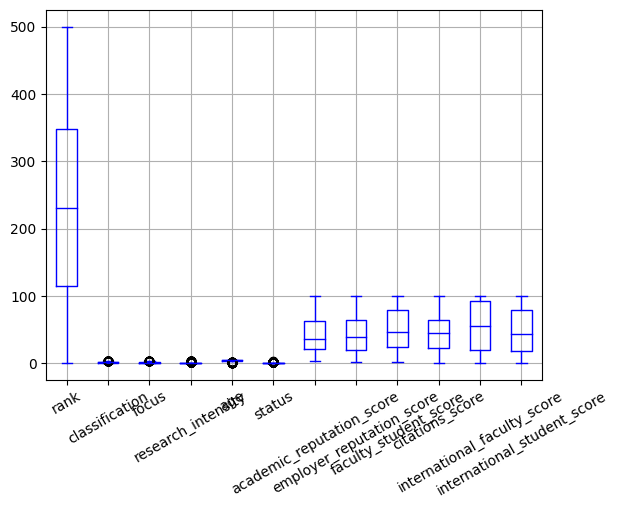

In [ ]:
 df_new.boxplot(grid='false', color='blue',fontsize=10, rot=30 )

Dari diagram boxplot, ditemukan bahwa dari rank tidak terdapat outlier, namun pada 'classification', 'focus', 'research_intensity', 'age' dan 'status' terdapat data outlier.

<Axes: >

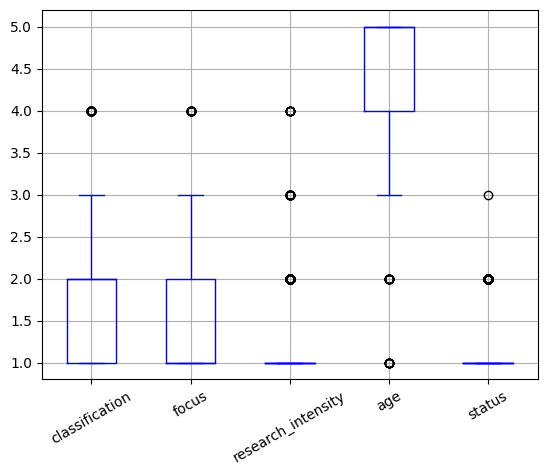

In [ ]:
 df_new[['classification','focus','research_intensity', 'age','status']].boxplot(grid='false', color='blue',fontsize=10, rot=30 )

In [ ]:
Q1st = df_new['status'].quantile(0.25)
Q3st = df_new['status'].quantile(0.75)
IQR = Q3st-Q1st
ul = Q3st+IQR*1.5
bl = Q1st-IQR*1.5

print(len(df_new[df_new['status'] > ul]))

203


###Cek korelasi

<Axes: >

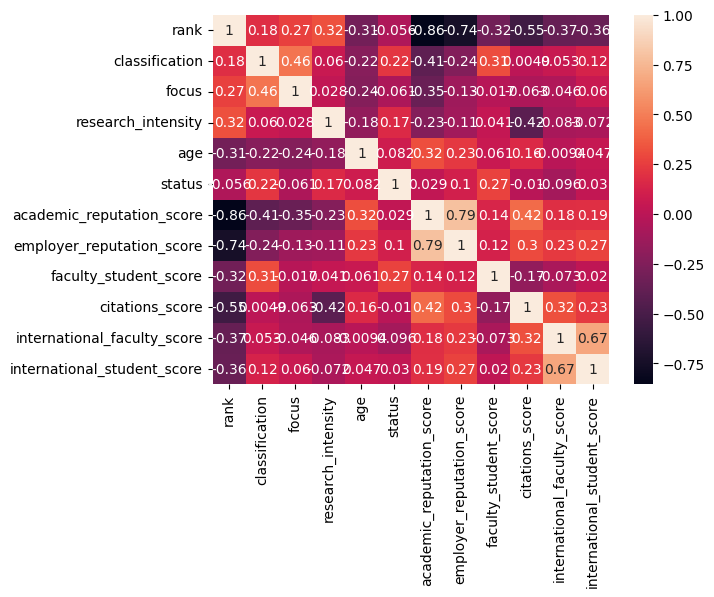

In [ ]:
sns.heatmap(df_new.corr(),annot=True)

Korelasi antara rank dengan status cukup kecil dibandingkan dengan korelasi antara rank dengan kolom lain, dan pada status juga terdapat data outlier dengan jumlah 203 baris, maka kolom status akan kita keluarkan dari dataframe yang akan digunakan untuk pemodelan

Kemudian kita lihat juga classification, focus, age, faculty_student_score, dan research_intensity memiliki korelasi yang cukup rendah dengan nilai korelasi lebih kecil dari 0.35, baik positif maupun negatif. Untuk itu akan kita keluarkan dari pemodelan

In [ ]:
df_new = df_new.drop(['classification','focus','age','faculty_student_score','research_intensity','status'], axis=1)
df_new

,rank,academic_reputation_score,employer_reputation_score,citations_score,international_faculty_score,international_student_score
0,1,100.0,100.0,99.9,100.0,96.1
1,2,100.0,100.0,99.4,99.6,72.7
2,3,100.0,100.0,99.9,96.5,75.2
3,4,99.5,85.4,100.0,93.4,89.2
4,5,100.0,100.0,78.3,97.4,97.7
...,...,...,...,...,...,...
1363,491,11.0,10.2,67.1,39.3,22.5
1364,491,10.8,11.4,1.8,1.3,78.4
1365,498,18.7,39.7,10.6,18.2,57.5
1366,498,20.3,18.8,42.8,20.1,39.3


<Axes: >

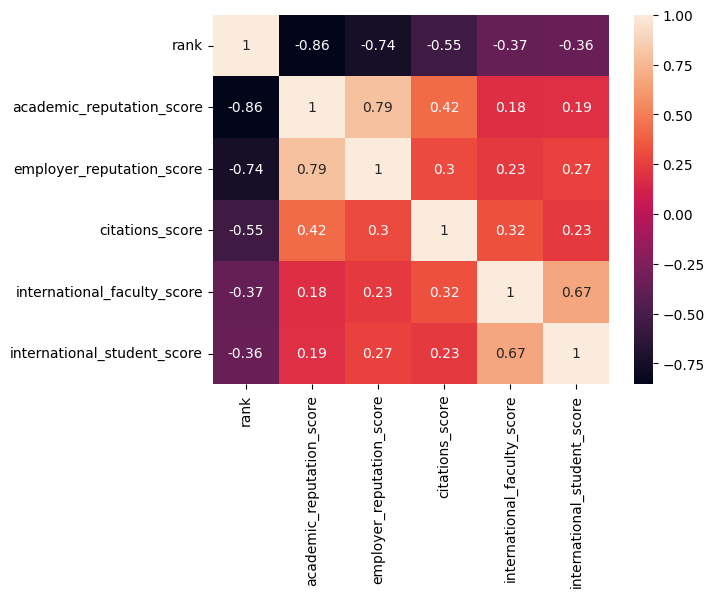

In [ ]:
sns.heatmap(df_new.corr(),annot=True)

##Proses pemodelan

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train = df_new.drop('rank',axis=1)
y_train = df_new['rank']
X_test = df2023a

X = df_new.drop('rank', axis=1)
y = df_new['rank']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

df2023a['predicted_rank'] = lr.predict(df2023a.drop(['institution','classification','focus','age','faculty_student_score','research_intensity','status'], axis=1))

R-squared: 0.8194527797609431


In [ ]:
import statsmodels.api as sm
ycheck = y_train
xcheck = sm.add_constant(X_train)
results = sm.OLS(ycheck,xcheck).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     798.1
Date:                Thu, 27 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:43:18   Log-Likelihood:                -5290.5
No. Observations:                 957   AIC:                         1.059e+04
Df Residuals:                     951   BIC:                         1.062e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         488.5252      4.917     99.349      0.000     478.875     498.175
academic_reputation_score      -3.2656      0.132    -24.750      0.000      -3.525      -3.007
employer_reputation_score      -0.5890      0.121     -4.865      0.000      -0.827      -0.351
citations_score                -0.9048      0.088    -10.328      0.000      -1.077      -0.733
international_faculty_score    -0.3845      0.078     -4.946      0.000      -0.537      -0.232
international_student_score    -0.4272      0.084     -5.107      0.000      -0.591      -0.263
==============================================================================
Omnibus:                        8.379   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                6.009
Skew:                           0.055   Prob(JB):                       0.0496
Kurtosis:                       2.628   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dari P-value pada setiap variabel dependen, ditemukan bahwa dengan signifikansi <0.05, maka terdapat cukup bukti untuk menolak H0, dalam artian lain, semua variabel dependen mempengaruhi Y (rank)

In [ ]:
print(df2023a[['citations_score', 'academic_reputation_score', 'employer_reputation_score', 'international_faculty_score', 'international_student_score','predicted_rank']])

      citations_score  academic_reputation_score  employer_reputation_score  \
0               100.0                      100.0                      100.0   
1                92.3                      100.0                      100.0   
2                99.9                      100.0                      100.0   
3                90.0                      100.0                      100.0   
4               100.0                      100.0                      100.0   
...               ...                        ...                        ...   
1411              1.1                        4.1                        4.8   
1412              1.2                        3.4                        7.5   
1418              2.2                        3.0                        5.8   
1419              3.6                        2.8                        2.6   
1421              1.5                        4.0                        2.1   

      international_faculty_score  international_st

Berdasarkan hasil model, kita mendapatkan nilai R2 sebesar 0.81, sehingga kita dapat berasumsi bahwa model regresi dapat digunakan untuk membuat prediksi.

Asumsi tersebut berdasarkan pernyataan yang dikutip dari accounting.binus.ac.id bahwa nilai R2 berkisar antara 0 dan 1, dengan nilai R2 diatas 0.67 dapat dikatakan kuat dan semakin dekat ke nilai 1, maka nilai R2 semakin baik.

Dilihat juga bahwa mesin memprediksi ranking dengan nilai berkisar dari tertinggi -66.23 dan terendah 466.87

Meskipun secara tampilan, hal ini tidak dapat dibenarkan, tapi secara konsep pengurutan ranking, hal tersebut dapat diterima. Untuk menyederhanakan tampilan ranking, maka kita akan tambahkan 1 kolom lagi yang memuat urutan ranking berdasarkan predicted_rank

In [ ]:
df2023a['rank_prediction'] = df2023a['predicted_rank'].rank(method='dense',ascending=True)
df2023a = df2023a.drop('predicted_rank',axis=1)
first_column = df2023a.pop('rank_prediction')
df2023a.insert(0,'rank_prediction', first_column)
df2023a

,rank_prediction,institution,classification,focus,research_intensity,age,status,academic_reputation_score,employer_reputation_score,faculty_student_score,citations_score,international_faculty_score,international_student_score
0,1.0,Massachusetts Institute of Technology (MIT),3,2,1,5.0,2,100.0,100.0,100.0,100.0,100.0,90.0
1,2.0,University of Cambridge,2,1,1,5.0,1,100.0,100.0,100.0,92.3,100.0,96.3
2,6.0,Stanford University,2,1,1,5.0,2,100.0,100.0,100.0,99.9,99.8,60.3
3,3.0,University of Oxford,2,1,1,5.0,1,100.0,100.0,100.0,90.0,98.8,98.4
4,9.0,Harvard University,2,1,1,5.0,2,100.0,100.0,99.4,100.0,76.9,66.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,1266.0,"Universidad Cat¢lica Boliviana ""San Pablo""",2,3,4,4.0,2,4.1,4.8,3.8,1.1,2.7,3.3
1412,1276.0,Universidad Cat¢lica de Santiago de Guayaquil,2,3,3,4.0,2,3.4,7.5,2.8,1.2,4.4,1.0
1418,1272.0,Universidad Tecnol¢gica de Bol¡var,3,3,2,4.0,2,3.0,5.8,2.4,2.2,9.3,1.3
1419,1288.0,Universit Mohammed V de Rabat,1,2,1,3.0,1,2.8,2.6,3.2,3.6,5.2,2.8


In [ ]:
df2023a['classification'] = df2023a['classification'].replace(1, 'XL')
df2023a['classification'] = df2023a['classification'].replace(2, 'L')
df2023a['classification'] = df2023a['classification'].replace(3, 'M')
df2023a['classification'] = df2023a['classification'].replace(4, 'S')

df2023a['focus'] = df2023a['focus'].replace(1, 'FC')
df2023a['focus'] = df2023a['focus'].replace(2, 'CO')
df2023a['focus'] = df2023a['focus'].replace(3, 'FO')
df2023a['focus'] = df2023a['focus'].replace(4, 'SP')

df2023a['research_intensity'] = df2023a['research_intensity'].replace(1, 'VH')
df2023a['research_intensity'] = df2023a['research_intensity'].replace(2, 'HI')
df2023a['research_intensity'] = df2023a['research_intensity'].replace(3, 'MD')
df2023a['research_intensity'] = df2023a['research_intensity'].replace(4, 'LO')

df2023a['status'] = df2023a['status'].replace(1, 'A')
df2023a['status'] = df2023a['status'].replace(2, 'B')
df2023a['status'] = df2023a['status'].replace(3, 'C')

df2023a

,rank_prediction,institution,classification,focus,research_intensity,age,status,academic_reputation_score,employer_reputation_score,faculty_student_score,citations_score,international_faculty_score,international_student_score
0,1.0,Massachusetts Institute of Technology (MIT),M,CO,VH,5.0,B,100.0,100.0,100.0,100.0,100.0,90.0
1,2.0,University of Cambridge,L,FC,VH,5.0,A,100.0,100.0,100.0,92.3,100.0,96.3
2,6.0,Stanford University,L,FC,VH,5.0,B,100.0,100.0,100.0,99.9,99.8,60.3
3,3.0,University of Oxford,L,FC,VH,5.0,A,100.0,100.0,100.0,90.0,98.8,98.4
4,9.0,Harvard University,L,FC,VH,5.0,B,100.0,100.0,99.4,100.0,76.9,66.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,1266.0,"Universidad Cat¢lica Boliviana ""San Pablo""",L,FO,LO,4.0,B,4.1,4.8,3.8,1.1,2.7,3.3
1412,1276.0,Universidad Cat¢lica de Santiago de Guayaquil,L,FO,MD,4.0,B,3.4,7.5,2.8,1.2,4.4,1.0
1418,1272.0,Universidad Tecnol¢gica de Bol¡var,M,FO,HI,4.0,B,3.0,5.8,2.4,2.2,9.3,1.3
1419,1288.0,Universit Mohammed V de Rabat,XL,CO,VH,3.0,A,2.8,2.6,3.2,3.6,5.2,2.8


###Pembuktian

Kemudian kita akan bandingkan hasil prediksi mesin dengan data terbaru (2021-2022)

In [ ]:
df2022 = pd.read_csv('2021-2022-University-Rankings.csv')

In [ ]:
df2022.head()

,rank_2022,rank_2021,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5,B,100,...,4,100,15,99.8,7,100,43,94.1,87,100
1,2,2,Stanford University,United States,L,FC,VH,5,B,100,...,5,100,12,98.6,13,99.8,62,67.7,196,98.4
2,3,3,Harvard University,United States,L,FC,VH,5,B,100,...,1,98.7,40,99.6,8,86.3,186,62.2,221,97.4
3,4,5,University of Oxford,United Kingdom,L,FC,VH,5,A,100,...,3,100,8,84.7,45,99.7,64,98.5,50,97.2
4,5,4,California Institute of Technology (Caltech),United States,S,CO,VH,5,B,97.8,...,74,100,4,100,4,99.4,72,87.3,121,96.9


In [ ]:
df_merged = pd.merge(df2023a, df2022, on='institution', how='left')
df_merged = df_merged.fillna('not ranked')
df_merged = df_merged[['rank_prediction','rank_2022','rank_2021','institution']]
df_merged

,rank_prediction,rank_2022,rank_2021,institution
0,1.0,not ranked,not ranked,Massachusetts Institute of Technology (MIT)
1,2.0,7,6,University of Cambridge
2,6.0,2,2,Stanford University
3,3.0,4,5,University of Oxford
4,9.0,3,3,Harvard University
...,...,...,...,...
1300,1266.0,not ranked,not ranked,"Universidad Cat¢lica Boliviana ""San Pablo"""
1301,1276.0,not ranked,not ranked,Universidad Cat¢lica de Santiago de Guayaquil
1302,1272.0,not ranked,not ranked,Universidad Tecnol¢gica de Bol¡var
1303,1288.0,not ranked,not ranked,Universit Mohammed V de Rabat


Kemudian kita lihat bahwa terdapat erro pada data MIT, dimana MIT terdapat pada df2022 dan df2023a, namun pada saat kita melakukan pembuktian, rank_2022 dan rank_2021 pada MIT tidak ditemukan.

Untuk itu kita coba munculkan data MIT tersebut pada kedua dataframe yang menjadi bahan pembuktian

In [ ]:
df2022[df2022['institution'] == 'Massachusetts Institute of Technology (MIT)']

,rank_2022,rank_2021,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5,B,100,...,4,100,15,99.8,7,100,43,94.1,87,100


In [ ]:
df2023a[df2023a['institution'] == 'Massachusetts Institute of Technology (MIT)']

,rank_prediction,institution,classification,focus,research_intensity,age,status,academic_reputation_score,employer_reputation_score,faculty_student_score,citations_score,international_faculty_score,international_student_score


In [ ]:
df2023a[df2023a['institution'] == 'Massachusetts Institute of Technology (MIT) ']

,rank_prediction,institution,classification,focus,research_intensity,age,status,academic_reputation_score,employer_reputation_score,faculty_student_score,citations_score,international_faculty_score,international_student_score
0,1.0,Massachusetts Institute of Technology (MIT),M,CO,VH,5.0,B,100.0,100.0,100.0,100.0,100.0,90.0


Terlihat bahwa terdapat typo pada MIT dalam df2023a, dimana terdapat kelebihan spasi setelah karakter terakhir. Hal ini menyebabkan saat sistem mencari ke data institusi, nama MIT tidak ditemukan pada df2022.

Kita akan lakukan rename terhadap data tersebut.

In [ ]:
df2023a['institution'] = df2023a['institution'].replace('Massachusetts Institute of Technology (MIT) ', 'Massachusetts Institute of Technology (MIT)')

In [ ]:
df2022['rank_2022'] = pd.to_numeric(df2022['rank_2022'], errors='coerce')
df2022['rank_2021'] = pd.to_numeric(df2022['rank_2021'], errors='coerce')
df_merged = pd.merge(df2023a, df2022, on='institution', how='left')
df_merged = df_merged.fillna('not ranked')
df_merged = df_merged[['rank_prediction','rank_2022','rank_2021','institution']]
df_merged.sort_values('rank_prediction', ascending=True)

,rank_prediction,rank_2022,rank_2021,institution
0,1.0,1.0,1.0,Massachusetts Institute of Technology (MIT)
1,2.0,7.0,6.0,University of Cambridge
3,3.0,4.0,5.0,University of Oxford
8,4.0,not ranked,not ranked,ETH Zurich - Swiss Federal Institute of Techno...
32,5.0,38.0,39.0,The University of Melbourne
...,...,...,...,...
1299,1301.0,not ranked,not ranked,Sudan University of Science and Technology
870,1302.0,not ranked,not ranked,Ufa State Aviation Technical University
1262,1303.0,not ranked,not ranked,Universidade Federal do Par - UFPA
1002,1304.0,not ranked,not ranked,Ivan Franko National University of Lviv


In [ ]:
df2023a['institution'] = df2023a['institution'].replace('ETH Zurich - Swiss Federal Institute of Technology','ETH Zurich (Swiss Federal Institute of Technology)')

In [ ]:
df2022['rank_2022'] = pd.to_numeric(df2022['rank_2022'], errors='coerce')
df2022['rank_2021'] = pd.to_numeric(df2022['rank_2021'], errors='coerce')
df_merged = pd.merge(df2023a, df2022, on='institution', how='left')
df_merged = df_merged.fillna('not ranked')
df_merged = df_merged[['rank_prediction','rank_2022','rank_2021','institution']]
df_merged.sort_values('rank_prediction', ascending=True)

,rank_prediction,rank_2022,rank_2021,institution
0,1.0,1.0,1.0,Massachusetts Institute of Technology (MIT)
1,2.0,7.0,6.0,University of Cambridge
3,3.0,4.0,5.0,University of Oxford
8,4.0,6.0,7.0,ETH Zurich (Swiss Federal Institute of Technol...
32,5.0,38.0,39.0,The University of Melbourne
...,...,...,...,...
1299,1301.0,not ranked,not ranked,Sudan University of Science and Technology
870,1302.0,not ranked,not ranked,Ufa State Aviation Technical University
1262,1303.0,not ranked,not ranked,Universidade Federal do Par - UFPA
1002,1304.0,not ranked,not ranked,Ivan Franko National University of Lviv


In [ ]:
df_merged.sort_values('rank_prediction', ascending=True).head(10)

,rank_prediction,rank_2022,rank_2021,institution
0,1.0,1.0,1.0,Massachusetts Institute of Technology (MIT)
1,2.0,7.0,6.0,University of Cambridge
3,3.0,4.0,5.0,University of Oxford
8,4.0,6.0,7.0,ETH Zurich (Swiss Federal Institute of Technol...
32,5.0,38.0,39.0,The University of Melbourne
2,6.0,2.0,2.0,Stanford University
6,7.0,9.0,8.0,Imperial College London
26,8.0,not ranked,not ranked,University of California. Berkeley (UCB)
4,9.0,3.0,3.0,Harvard University
10,10.0,not ranked,11.0,National University of Singapore (NUS)


Mungkin masih terdapat data-data lain yang memiliki ketidaksamaan data pada institution, sehingga ada kemungkinan pada rank_2022 dan rank_2021 tercatat sebagai not ranked.

Namun karena tujuannya adalah untuk pembuktian akurasi model, maka hal ini dapat diabaikan, mengingat nama institusi tidak kita jadikan input dalam membuat model.

Secara umum, akurasi yang dimiliki cukup baik dengan R2 0.81. Dari pembuktian juga dapat dilihat bahwa selisih antar ranking pada 2021, 2022, dan dari data 2023 tidak terlalu jauh, meskipun beberapa memiliki perbedaan yang cukup tinggi.